<a href="https://colab.research.google.com/github/gabbyreese/gabbyreese.github.io/blob/main/BestStateToLiveInPostGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining The Best State to Live In as a Post-Grad

Cece Haase and Gabby Reese

[Link to our GitHub website](https://github.com/gabbyreese/gabbyreese.github.io/)

# Project Goals
The goal of this project is to investigate and determine the best state to live in as a post-grad in terms of various researched factors. The conditions we have selected that are important factors are the level of crime, cost of living, average age, and level of diversity within a state. After speaking with my post-grads we have deteremined that an ideal post-grade environment would have a low level of crime, a low cost of living, a younger average age, and a high level of diversity.


# Initial Work

First, we will install all of the libraries that we will use throughout the project.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Examining the Data
**U.S. Crime Data by State**

Our first data set we will be downloading is the determined crime rate by state. The data includes the state name, urban population, and the number of murder, assault, and rape cases per 100,000 residents in one year. The data was taken from the World Almanac.

To tidy this data up, we first dropped the urban population column and added the column title of "State".

In [ ]:
USdf_crime=pd.read_csv('/content/sample_data/US_violent_crime.csv')
df_crime.rename(columns={'Unnamed: 0': "State"}, inplace = True)
df_crime.drop('UrbanPop', axis=1, inplace=True)
df_crime


,State,Murder,Assault,Rape
0,Alabama,13.2,236,21.2
1,Alaska,10.0,263,44.5
2,Arizona,8.1,294,31.0
3,Arkansas,8.8,190,19.5
4,California,9.0,276,40.6
5,Colorado,7.9,204,38.7
6,Connecticut,3.3,110,11.1
7,Delaware,5.9,238,15.8
8,Florida,15.4,335,31.9
9,Georgia,17.4,211,25.8


The rest of our data is going to be in state codes, rather than utilizing the full name of a state. To keep it consistent, we must convert these state names to their respective state code. We did this by adding the state codes in alphabetical order, dropping the state column, and then setiing the index as the state code values.

In [ ]:
state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

df_crime['State Code'] = state_codes

In [ ]:
df_crime.drop('State', axis=1, inplace=True)


In [ ]:
df_crime.set_index(['State Code'], inplace=True)

Next, we added a column for the total. This allows us to see the total number of criminal cases per 100,000 residents per state. This will make it easier to compare state crime rates.

In [ ]:
df_crime['Total'] = df_crime[['Murder', 'Assault', 'Rape']].sum(axis=1)

In [ ]:
df_crime

,Murder,Assault,Rape,Total
State Code,,,,
AL,13.2,236,21.2,270.4
AK,10.0,263,44.5,317.5
AZ,8.1,294,31.0,333.1
AR,8.8,190,19.5,218.3
CA,9.0,276,40.6,325.6
CO,7.9,204,38.7,250.6
CT,3.3,110,11.1,124.4
DE,5.9,238,15.8,259.7
FL,15.4,335,31.9,382.3


In [ ]:
df_crime.reset_index(inplace=True)
df_crime_tidy = df_crime.melt(id_vars=["State Code"], var_name="Crime Type", value_name="Count")


This is our final tidied version of the dataset, "U.S. Crime Data by State". We have ranked the values from lowest to highest crime rate by State.

In [ ]:
df_crime.sort_values(by='Total', ascending=True, inplace=True)
df_crime.reset_index(inplace=True)
df_crime

,index,State Code,Murder,Assault,Rape,Total
0,33,ND,0.8,45,7.3,53.1
1,44,VT,2.2,48,11.2,61.4
2,48,WI,2.6,53,10.8,66.4
3,28,NH,2.1,57,9.5,68.6
4,14,IA,2.2,56,11.3,69.5
5,10,HI,5.3,46,20.2,71.5
6,22,MN,2.7,72,14.9,89.6
7,18,ME,2.1,83,7.8,92.9
8,47,WV,5.7,81,9.3,96.0
9,40,SD,3.8,86,12.8,102.6


In [ ]:
df_crime.reset_index(inplace=True)
df_crime_ranked= df_crime[['index', 'State Code' ]]
df_crime_ranked.rename(columns={'index': "Crime", 'State Code': 'State'}, inplace = True)
df_crime_ranked

In [ ]:

import altair as alt
chart = alt.Chart(df_crime).mark_bar().encode(x='State Code', y='Total').properties(height=400, width=800)
chart


alt.Chart(...)

Next, we analyzed this initial data for this specific condition. We can see that North Dakota, Vermont, and Wisconsin have the lowest crime rates. The highest crimes rates are in Florida, North Carolina, and Maryland.

**U.S. Cost of Living by State**

Our next data set we will be downloading is the cost of living by state. The data includes the average cost of various bills per state. The values include Conversion, Grocery, Housing, Utilities, Transportation, Health, and Misc. The data was taken from the Missouri Economic Research and Information Center.

To tidy this data up, we first had to drop certain rows that where not pertainable to the data we where researching.

In [ ]:
df_costliving = pd.read_csv('/content/sample_data/Cost_of_living_Missouri_Economic_Research_and_Information_Center.csv')
df_costliving.drop([26, 50, 52, 53, 54, 55], axis=0, inplace=True)

In [ ]:
df_costliving

,Rank,State,Conversion,Grocery,Housing,Utilities,Transportation,Health,Misc.
0,1.0,MS,85.3,97.1,68.6,86.1,88.6,97.6,91.0
1,2.0,OK,86.0,93.8,68.0,98.2,92.3,91.8,91.5
2,3.0,KS,87.7,96.8,69.4,107.5,88.3,97.1,91.9
3,4.0,MO,88.4,94.8,77.2,97.7,90.3,89.9,91.6
4,5.0,AL,88.8,96.4,70.4,103.6,92.0,86.9,96.2
5,6.0,IA,89.7,96.8,72.4,94.5,100.6,99.7,95.4
6,7.0,NE,90.1,95.2,78.4,85.7,101.8,97.1,94.8
7,8.0,WV,90.3,97.7,70.9,94.5,97.8,97.0,99.0
8,9.0,AR,90.3,95.4,76.3,91.8,92.2,87.2,99.1
9,10.0,TN,90.4,97.8,82.9,93.2,90.0,88.1,92.8


In [ ]:
df_costliving['Total'] = df_costliving.iloc[:, 3:9].sum(axis=1)


Next, we added a totals column. This would allow us to compare the total average cost of living between states.

In [ ]:
df_costliving

,Rank,State,Conversion,Grocery,Housing,Utilities,Transportation,Health,Misc.,Total
0,1.0,MS,85.3,97.1,68.6,86.1,88.6,97.6,91.0,529.0
1,2.0,OK,86.0,93.8,68.0,98.2,92.3,91.8,91.5,535.6
2,3.0,KS,87.7,96.8,69.4,107.5,88.3,97.1,91.9,551.0
3,4.0,MO,88.4,94.8,77.2,97.7,90.3,89.9,91.6,541.5
4,5.0,AL,88.8,96.4,70.4,103.6,92.0,86.9,96.2,545.5
5,6.0,IA,89.7,96.8,72.4,94.5,100.6,99.7,95.4,559.4
6,7.0,NE,90.1,95.2,78.4,85.7,101.8,97.1,94.8,553.0
7,8.0,WV,90.3,97.7,70.9,94.5,97.8,97.0,99.0,556.9
8,9.0,AR,90.3,95.4,76.3,91.8,92.2,87.2,99.1,542.0
9,10.0,TN,90.4,97.8,82.9,93.2,90.0,88.1,92.8,544.8


In [ ]:

df_costliving_tidy = pd.melt(df_costliving, id_vars=['Rank', 'State'], var_name='Category', value_name='Cost')
df_costliving_tidy


,Rank,State,Category,Cost
0,1.0,MS,Conversion,85.3
1,2.0,OK,Conversion,86.0
2,3.0,KS,Conversion,87.7
3,4.0,MO,Conversion,88.4
4,5.0,AL,Conversion,88.8
...,...,...,...,...
395,47.0,AK,Total,784.1
396,48.0,NY,Total,699.0
397,49.0,CA,Total,765.0
398,50.0,MA,Total,816.5


This is our final tidied version of the dataset, "U.S. Cost of Living by State" which we will be working with. We have ranked the values by lowest to highest cost of living.

<Axes: >

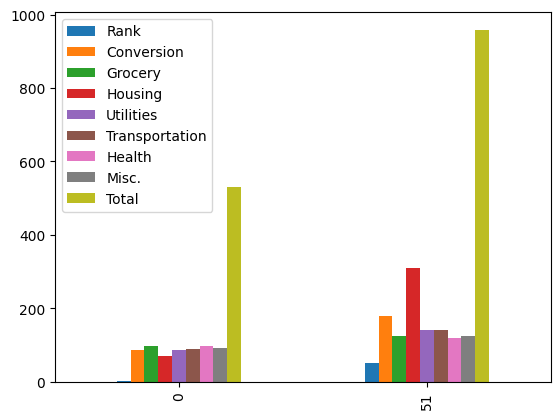

In [ ]:

df_costliving.iloc[[0, -1]].plot(kind='bar')


This is a graph comparing the highest cost of living state, Hawaii, to the lowest cost of living state, Missouri. Housing by far is the priciest cost in Hawaii, while in Missouri costs are relatively the same with grocery store costs being the highest.

In [ ]:
df_cost_ranked = df_costliving[['Rank', 'State']]

In [ ]:

import altair as alt
alt.Chart(df_costliving).mark_bar().encode(x='State', y='Total')


alt.Chart(...)

With this data set, we will analyze the total cost of living for each of our particular states. This is a useful data set to have because determing whether a state is affordable or not is an important part of selecting a state to live in. This graph analyzes these states by their total cost. In this graph, we can see the cost of living is relatively similar between many states. However, Hawaii, Alaska, California and Massachusetts have very high costs of living compared to the other states. While, Missouri, Oklahoma, and Kansas have the lowest costs of living.

**U.S. Demographics by State**

Our next data set we will be downloading is data about eachs state's demographics. With this data set, we will be using certain factors to determine the level of diversity in each state and the median age in each state. This data comes from the US Census Bureau's 2015 American Community Survey.

First, we are going to focus on finding the median age of each state. To tidy this data up, we first had to drop certain rows that where not pertainable to the data we where researching. This included the City, Race, and State columns. We then grouped the data by State Code.

In [ ]:
df_demographics=pd.read_csv('/content/sample_data/us-cities-demographics.csv', sep=";")

df_demographics.drop(columns=["City", "Race", "State" ], inplace=True)
df_demographics=df_demographics.groupby(df_demographics['State Code']).mean()


In [ ]:
df_demographics

,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,Count
State Code,,,,,,,,
AK,32.200000,152945.000000,145750.000000,298695.000000,27492.000000,33258.000000,2.770000,67245.600000
AL,36.161765,72005.882353,79856.058824,151861.941176,10379.294118,7427.676471,2.430000,32239.823529
AR,32.737931,48300.827586,51109.137931,99409.965517,5323.793103,10612.172414,2.526897,22193.000000
AZ,35.037500,139215.937500,142005.437500,281221.375000,16531.562500,42644.562500,2.774375,71936.012500
CA,36.173964,90319.041420,92290.948225,182609.989645,6829.914201,54821.985207,3.095325,46972.955621
CO,35.818750,90913.687500,92565.625000,183479.312500,11743.500000,21101.937500,2.560000,44838.550000
CT,35.002564,54447.051282,57222.076923,111669.128205,3142.205128,28570.512821,2.666154,28372.512821
DC,33.800000,319705.000000,352523.000000,672228.000000,25963.000000,95117.000000,2.240000,145303.800000
DE,36.400000,32680.000000,39277.000000,71957.000000,3063.000000,3336.000000,2.450000,15009.600000


In [ ]:

df_demographics_tidy = df_demographics.melt(id_vars=[ 'State Code'], var_name='Variable', value_name='Value')
df_demographics_tidy

,State Code,Variable,Value
0,AK,Median Age,32.200000
1,AL,Median Age,36.161765
2,AR,Median Age,32.737931
3,AZ,Median Age,35.037500
4,CA,Median Age,36.173964
...,...,...,...
387,TX,Count,73368.663004
388,UT,Count,24602.770833
389,VA,Count,37291.871429
390,WA,Count,33322.129412


This is our tidied version of our Median Age per State data. We have ranked the values by youngest median age to highest median age.

In [ ]:
df_demographics.sort_values(by="Median Age", ascending=True, inplace=True)
df_demographics.reset_index(inplace=True)
df_demographics.reset_index(inplace=True)
df_demographics_ranked = df_demographics[['index', 'State Code']]
df_demographics_ranked.rename(columns={'index': "Age", 'State Code': 'State'}, inplace = True)
df_demographics_ranked

<ipython-input-41-3eba029a0cc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographics_ranked.rename(columns={'index': "Age", 'State Code': 'State'}, inplace = True)


,Age,State
0,45,UT
1,0,AK
2,12,IA
3,2,AR
4,25,MS
5,29,NE
6,44,TX
7,36,OK
8,48,WI
9,27,NC


This is our tidied data ranked. The Age column shows their ranking in youngest median age of residents.

<Axes: xlabel='State Code'>

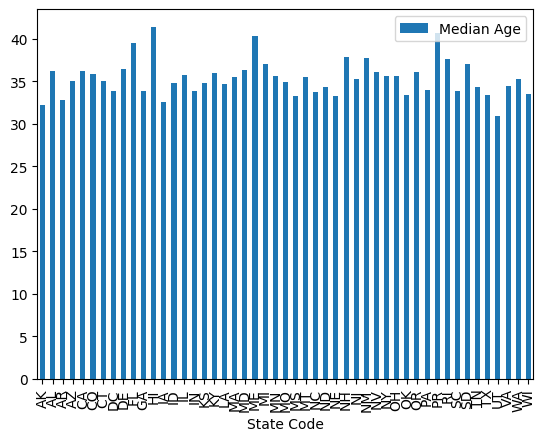

In [ ]:
df_demographics.reset_index(inplace=True)
df_demographics.plot(x='State Code', y='Median Age', kind='bar')


This is an intial representation of our median age data by state. Utah, Alaska, and Arkansas had the three youngest median ages of state residents. Hawaii, Maine, and Florida had the highest median ages of state residents.

**U.S. Demographics by State Continued**

We will also be using this same dataset to determine the average rate of diversity in each state. First, we grouped each unique state code together with its mean and dropped unnecessary data. Then, we reset the index to make 'LSTATE' a regular column. After this, we sorted the values by their rate of diversity and set this number as their index.

In [ ]:
df_qol=pd.read_csv('/content/sample_data/QOL(County Level).csv')
df_qol
df_diversityR = df_qol[["LSTATE", "Diversity Rank (Race)"]].copy()


In [ ]:
df_diversity = df_diversityR.groupby('LSTATE').agg({'Diversity Rank (Race)': 'mean'})
df_diversity.reset_index(inplace=True)



In [ ]:
df_diversity.sort_values(by="Diversity Rank (Race)", ascending=True, inplace=True)
df_diversity.reset_index(inplace=True)
df_diversity.drop(columns='index')
df_diversity.reset_index(inplace=True)

In [ ]:
df_diversity_ranked = df_diversity[['level_0', 'LSTATE']]
df_diversity_ranked.rename(columns={'level_0': "Diversity", 'LSTATE': 'State'}, inplace = True)
df_diversity_ranked

<ipython-input-46-3548375d2bec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diversity_ranked.rename(columns={'level_0': "Diversity", 'LSTATE': 'State'}, inplace = True)


,Diversity,State
0,0,KS
1,1,GA
2,2,ND
3,3,NE
4,4,VA
5,5,OK
6,6,AR
7,7,SD
8,8,AK
9,9,TX


This is the final tidied version of this condition. We have ranked the data from highest to lowest level of diversity. In examining this data, we can see that Kansas, Georgia, and North Dakota have the lowest rate of population diversity. While, Arizona, New Jersey, and Conneticut have the highest rate of population diversity.

# Combining the State Data

After cleaning up each dataset and performing an exploratory analysis on the initial data, we will now combine our data into one table. First, we will merge the "State" columns on each of our seperate data tables.

In [ ]:
merged_df = pd.merge(df_cost_ranked, df_crime_ranked, on='State')

merged_df = pd.merge(merged_df, df_demographics_ranked, on='State')

merged_df = pd.merge(merged_df, df_diversity_ranked, on='State')


In [ ]:
merged_df.rename(columns={'Rank': "Living Cost"}, inplace=True)

In [ ]:
merged_df.set_index('State', inplace=True)


Then, we merged each of the total columns.

In [ ]:
merged_df['Total'] = merged_df.sum(axis=1)

In [ ]:
merged_df.sort_values(by='Total', ascending=True, inplace=True)
merged_df

,Living Cost,Crime,Age,Diversity,Total
State,,,,,
AR,9.0,3,2,6,20.0
GA,12.0,9,10,1,32.0
KS,3.0,15,16,0,34.0
AL,5.0,0,1,28,34.0
IA,6.0,14,12,10,42.0
CO,35.0,5,5,11,56.0
AK,47.0,1,0,8,56.0
KY,18.0,16,17,14,65.0
NE,7.0,26,29,3,65.0


In [ ]:
merged_df.reset_index(inplace=True)

In [ ]:
merged_df

,State,Living Cost,Crime,Age,Diversity,Total
0,AR,9.0,3,2,6,20.0
1,GA,12.0,9,10,1,32.0
2,KS,3.0,15,16,0,34.0
3,AL,5.0,0,1,28,34.0
4,IA,6.0,14,12,10,42.0
5,CO,35.0,5,5,11,56.0
6,AK,47.0,1,0,8,56.0
7,KY,18.0,16,17,14,65.0
8,NE,7.0,26,29,3,65.0
9,IN,13.0,13,15,25,66.0


This is our finalized data set. This data set shows each state's individual rank in each of our chosen conditions. Then, we added up each of these values to receive their total rank. The better a state's conditions are for a post-grad life, the lower the state's total score is. After speaking with my post-grads we have deteremined that an ideal post-grade environment would have a low level of crime, a low cost of living, a younger average age, and a high level of diversity which is reflected by our data.

In [ ]:

import altair as alt
alt.Chart(merged_df).mark_bar().encode(x='State', y='Total').properties(width=600)


alt.Chart(...)

This is a histogram of our final data. Based on our conditions, our data shows that the most ideal state to live in as a post-grad is Arkansas.

**K Neareast Neighbor Prediction**

To further utilize this database, we will be using the kNN model to determine the best post-grad city for Cece to live in based on her conditions. We had Cece rank each condition on a scale of 1 to 10 based on how important each condition is to her. She found that the three states closest to her ideal conditions where Arkansas, Georgia, and Iowa.

In [ ]:
X_train = merged_df[["Living Cost", "Crime", "Age", "Diversity"]]
y_train = merged_df["State"]

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_sc = (X_train - X_train_mean) / X_train_std


In [ ]:
#Cece Predicting Her Best State
#Rank how important you feel each value is to you on a scale of 1 to 10
x_new = pd.Series(dtype=float)
x_new["Living Cost"] = 1
x_new["Crime"] = 2
x_new["Age"] = 3
x_new['Diversity'] = 4

In [ ]:
x_new_sc = (x_new - X_train_mean) / X_train_std
x_new_sc

dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
dists_sorted = dists.sort_values()
dists_sorted

i_nearest = dists_sorted.index[:3]
i_nearest

merged_df.loc[i_nearest]

,State,Living Cost,Crime,Age,Diversity,Total
0,AR,9.0,3,2,6,20.0
1,GA,12.0,9,10,1,32.0
4,IA,6.0,14,12,10,42.0


# Conclusion

In conclusion, we found that many of our ideal post-grad states where either in the South or the Midwest. We also found that each of these states have a mid-size state population. It is interesting to compare each state based on our conditions. To further expand this research, we could add more conditions. We could include the level of unemployment in each state, population, and number of major cities in each state. We hope to continue to develop our database and kNN model so many students can utilize it to determine the best post-grad city for themselves.

In [ ]:

#jupyter nbconvert --to html '/content/drive/MyDrive/Other/Data Science Final Project'
!jupyter nbconvert mynotebook.ipynb --stdout

[NbConvertApp] WARNING | pattern 'mynotebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    